In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2

In [2]:
path1=r"D:\fracture_notfracture"
cate=['fractured','notfractured']

In [3]:
for i in cate:
    folders = os.path.join(path1,i)
    print(folders)

D:\fracture_notfracture\fractured
D:\fracture_notfracture\notfractured


In [4]:
for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        print(image_path)

D:\fracture_notfracture\fractured\0.jpg
D:\fracture_notfracture\fractured\0.png
D:\fracture_notfracture\fractured\0._jumbo (1).jpeg
D:\fracture_notfracture\fractured\0._jumbo.jpeg
D:\fracture_notfracture\fractured\00004541.png
D:\fracture_notfracture\fractured\000151.png
D:\fracture_notfracture\fractured\000151594.png
D:\fracture_notfracture\fractured\0001517989.png
D:\fracture_notfracture\fractured\000151898.png
D:\fracture_notfracture\fractured\000151899789.png
D:\fracture_notfracture\fractured\0005156.png
D:\fracture_notfracture\fractured\0010.png
D:\fracture_notfracture\fractured\0012.png
D:\fracture_notfracture\fractured\0013.png
D:\fracture_notfracture\fractured\0014.png
D:\fracture_notfracture\fractured\0015.png
D:\fracture_notfracture\fractured\00156.png
D:\fracture_notfracture\fractured\00233.png
D:\fracture_notfracture\fractured\002555.png
D:\fracture_notfracture\fractured\0045.png
D:\fracture_notfracture\fractured\00655154.png
D:\fracture_notfracture\fractured\007.png
D:\fra

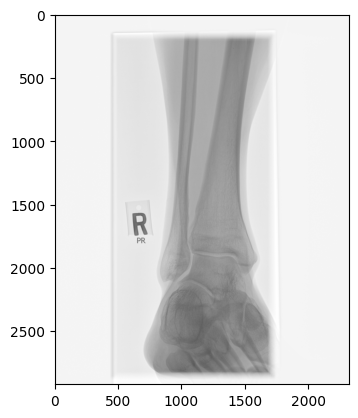

In [5]:
# this code is only for to check we read file correctly or not
for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [6]:
image_size=200   # hyper parameter
input_image=[]
for i in cate:
    folders = os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [7]:
np.random.shuffle(input_image)

In [8]:
# this will separate x and y
X=[]
Y=[]

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [9]:
X_train = X[0:7371]
X_test=X[7371:9194]

Y_train = Y[0:7371]
Y_test = Y[7371:9194]

X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [11]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(50,activation='relu',input_shape=X_train.shape[1::]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
adam=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train,validation_split=.2,epochs=3,batch_size=64)

Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 652s 7s/step - accuracy: 0.6196 - loss: 13.2445 - val_accuracy: 0.8339 - val_loss: 0.4317
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 634s 7s/step - accuracy: 0.8935 - loss: 0.2920 - val_accuracy: 0.9492 - val_loss: 0.1641
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 939s 10s/step - accuracy: 0.9469 - loss: 0.1400 - val_accuracy: 0.9593 - val_loss: 0.1152


In [14]:
pred = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step


In [15]:
pred_classes= pred.argmax(axis=1)

In [16]:
from sklearn.metrics import confusion_matrix

In [19]:
tab1=confusion_matrix(Y_test,pred_classes)

In [20]:
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score,classification_report

In [21]:
print(classification_report(Y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       895
           1       0.95      0.96      0.96       928

    accuracy                           0.96      1823
   macro avg       0.96      0.96      0.96      1823
weighted avg       0.96      0.96      0.96      1823

